# Portfolio Analysis - Quadratic Programming

In [2]:
import pandas as pd
import yfinance as yf
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt




In [3]:
# Read tickers from Excel
# df = pd.read_excel('Stock Ticker.xlsx')
# tickers = df['Ticker'].tolist()
tickers = ['BHEL.NS', 'ASHOKLEY.NS', 'BOMDYEING.NS', 'FORTISMLR.BO', 'CGPOWER.NS', 'RAJESHEXPO.NS', 'DBOL.NS', 'CESC.NS', 'GTL.BO','IFCI.NS','IDFCFIRSTB.NS', 'HINDZINC.NS', 'JMFINANCIL.NS', 'JSWSTEEL.NS', 'JYOTIRES.BO','MSUMI.NS',
           'MRPL.NS', 'ONGC.NS', 'PURVA.NS', 'PTL.NS', 'DEEPAKNTR.NS', 'SBIN.NS', 'TATAMOTORS.NS', 'SEPC.NS', 'VBL.NS', 'WELCORP.NS', 'TATAPOWER.NS', 'ZOMATO.NS', 'POLYCAB.NS', 'ZEEL.NS', 'YESBANK.NS']

In [57]:
# Fetch historical stock data
stock_data = yf.download(tickers, start='2022-12-1', end='2023-11-30', interval='1wk')['Adj Close']

[*********************100%%**********************]  31 of 31 completed


In [5]:
stock_data

,ASHOKLEY.NS,BHEL.NS,BOMDYEING.NS,CESC.NS,CGPOWER.NS,DBOL.NS,DEEPAKNTR.NS,FORTISMLR.BO,GTL.BO,HINDZINC.NS,...,RAJESHEXPO.NS,SBIN.NS,SEPC.NS,TATAMOTORS.NS,TATAPOWER.NS,VBL.NS,WELCORP.NS,YESBANK.NS,ZEEL.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-28,143.752090,90.187256,85.300003,71.163231,276.726013,202.275742,2203.230957,57.000000,7.59,260.079865,...,727.299988,595.968811,8.200000,434.047211,223.171570,657.414246,245.162384,17.400000,271.049988,68.550003
2022-12-05,141.389847,85.157486,82.650002,71.916771,274.587036,187.112274,2183.305908,57.000000,8.74,269.915924,...,716.900024,604.748230,11.350000,412.015869,217.375549,703.108215,239.422134,19.700001,260.700012,64.150002
2022-12-12,138.781540,80.476318,82.099998,75.590324,276.875244,198.424698,2100.466797,55.599998,8.76,272.215210,...,802.849976,591.848877,11.850000,420.290100,215.344467,696.327637,228.432266,21.200001,250.550003,62.150002
2022-12-19,135.681107,73.653748,74.500000,70.833542,250.361679,175.462891,1881.239624,58.650002,7.18,266.679779,...,636.099976,563.058350,9.450000,377.174469,195.083160,641.958618,200.025421,17.450001,235.050003,53.650002
2022-12-26,141.143784,78.882721,79.250000,71.963875,268.916199,194.958755,1977.876953,58.200001,8.01,273.960999,...,731.700012,602.001587,10.350000,386.744659,205.783508,659.383667,232.504395,20.600000,240.050003,59.299999
2023-01-02,145.425339,81.422508,77.000000,71.445808,268.617737,181.528275,1929.309204,56.700001,7.94,283.413788,...,796.549988,589.200378,11.550000,380.813110,203.504730,648.589600,214.645859,21.100000,237.800003,55.250000
2023-01-09,144.736359,80.376709,78.300003,69.656128,306.970398,178.976959,1936.930420,56.049999,7.83,297.805939,...,802.150024,588.660828,11.650000,410.221466,204.545044,566.250793,211.751221,20.150000,230.250000,53.250000
2023-01-16,141.783554,80.476318,76.199997,69.514839,311.148895,175.703568,1880.492432,57.900002,7.66,300.616211,...,875.450012,580.911438,14.750000,401.897400,205.288116,614.562256,222.446701,19.750000,222.750000,51.450001
2023-01-23,147.000168,72.956558,72.949997,68.290321,296.872345,156.352112,1817.030518,55.000000,5.89,294.953064,...,841.799988,529.657410,13.350000,444.215515,200.482880,619.498047,203.018188,17.500000,215.350006,46.950001


In [58]:
# Calculate expected returns and covariance matrix
returns = stock_data.pct_change().mean().values
cov_matrix = stock_data.pct_change().cov().values

In [62]:
# Number of assets
num_assets = len(returns)

# Define variables
weights = cp.Variable(num_assets)
target_return = 0.02

In [63]:
# Define objective function and Constraints
objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

constraints = [
    cp.sum(weights) == 1,
    weights >= 0,
    returns @ weights >= target_return
]

problem = cp.Problem(objective, constraints)
problem.solve()

0.005482901316437975

In [64]:
# Display results
optimal_weights = weights.value
print("Optimal weights:", optimal_weights)
print("Minimum risk:", problem.value)
print("Expected return:", returns @ optimal_weights)

Optimal weights: [2.97327637e-22 1.01380517e-22 1.22764891e-22 2.68365349e-22
 1.83554689e-22 4.43495182e-22 3.89409755e-22 3.22831350e-22
 3.00596498e-22 3.46137334e-22 2.38078239e-22 9.44800165e-23
 3.51070558e-22 3.60591997e-22 2.98820493e-22 8.31556311e-23
 3.75375406e-22 2.43217575e-22 1.17478337e-22 2.57715262e-22
 1.55705763e-22 6.46737953e-22 4.11407349e-22 5.17521261e-01
 1.91615018e-22 3.18263219e-22 1.79025804e-22 4.82478739e-01
 3.25131667e-22 4.00901549e-22 1.46242927e-22]
Minimum risk: 0.005482901316437975
Expected return: 0.020000000000000004


In [65]:
# Create a DataFrame for optimal weights
optimal_weights_df = pd.DataFrame({'Ticker': tickers, 'Optimal_Weight': optimal_weights})

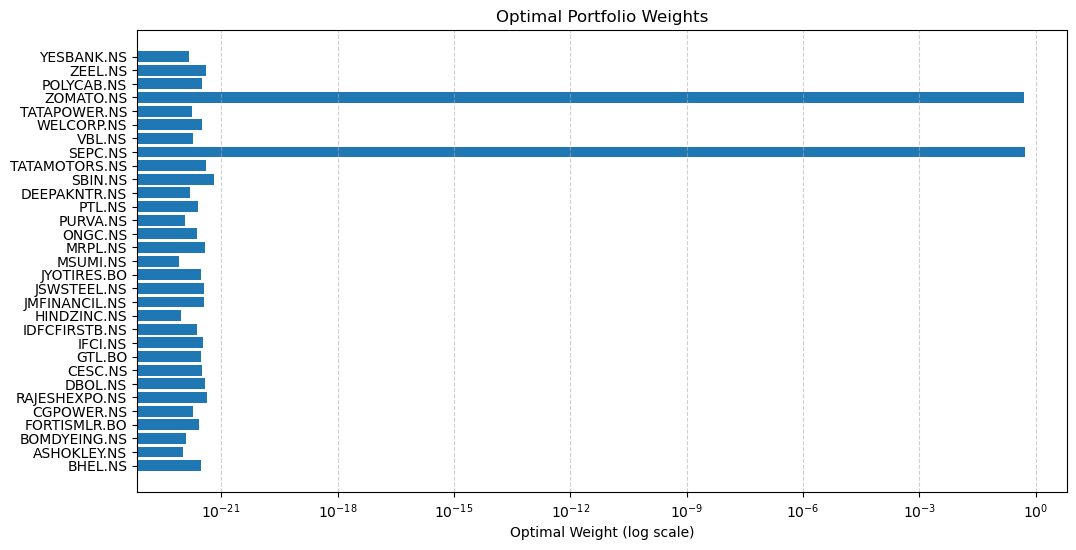

In [66]:
# Plot the optimal weights using a horizontal bar chart with logarithmic scale
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(optimal_weights_df['Ticker'], optimal_weights_df['Optimal_Weight'])
plt.xscale('log')  # Set logarithmic scale for better visualization
plt.xlabel('Optimal Weight (log scale)')
plt.title('Optimal Portfolio Weights')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()




CORRELATION MATRIX

In [12]:
# Download historical stock data
stock_data = yf.download(tickers, start='2022-12-01', end='2023-11-30', interval='1wk')['Adj Close']


[*********************100%%**********************]  31 of 31 completed


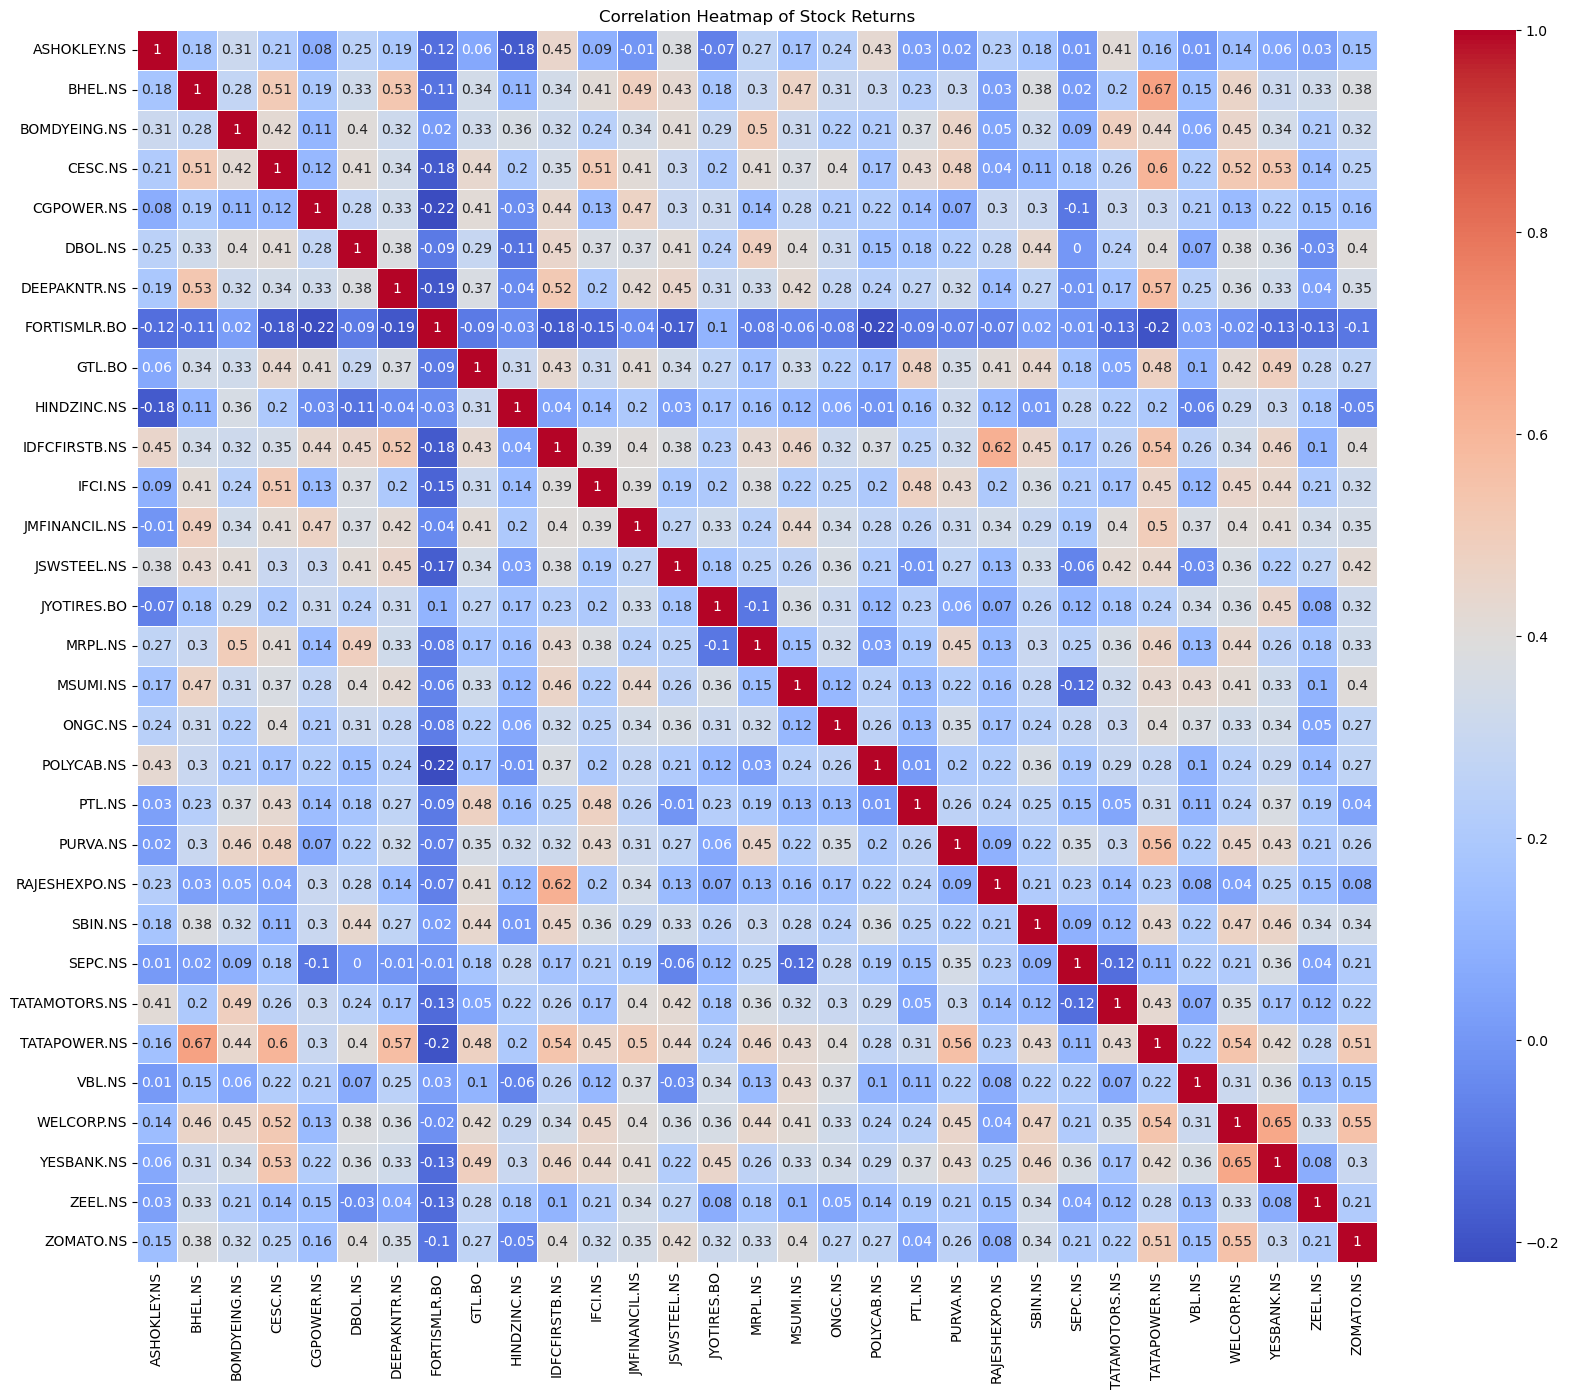

In [13]:
# Calculate the correlation matrix
correlation_matrix = stock_data.corr()


# Calculate daily returns
returns = stock_data.pct_change()

# Create a correlation matrix & Heat Map
correlation_matrix = returns.corr().round(2)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Returns')
plt.show()


SHARPE RATIO

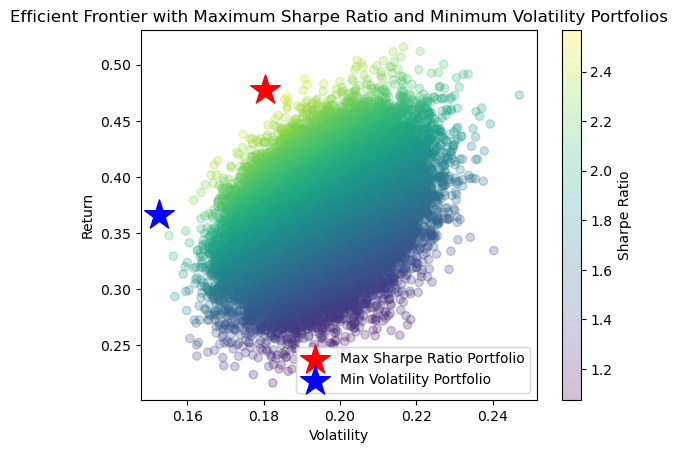

In [43]:
# Calculate weekly returns
returns = stock_data.pct_change()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Number of portfolios to simulate
num_portfolios = 50000

# Results placeholders
results = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Portfolio mean return
    portfolio_return = np.sum(weights * mean_returns) * 52  # Adjust for the number of weeks in a year

    # Portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 52, weights)))  # Adjust for the number of weeks in a year

    risk_free_rate = 0.014  # Replace with your actual risk-free rate
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    # Save the results
    results.append([portfolio_return, portfolio_stddev, sharpe_ratio, weights])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Return', 'Volatility', 'Sharpe Ratio', 'Weights'])

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Find the portfolio with the minimum volatility
min_volatility_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

# Plot the efficient frontier
plt.scatter(results_df.Volatility, results_df.Return, c=results_df['Sharpe Ratio'], cmap='viridis', marker='o', alpha=0.25)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker='*', color='r', s=500, label='Max Sharpe Ratio Portfolio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], marker='*', color='b', s=500, label='Min Volatility Portfolio')
plt.title('Efficient Frontier with Maximum Sharpe Ratio and Minimum Volatility Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

<Figure size 2000x1600 with 0 Axes>

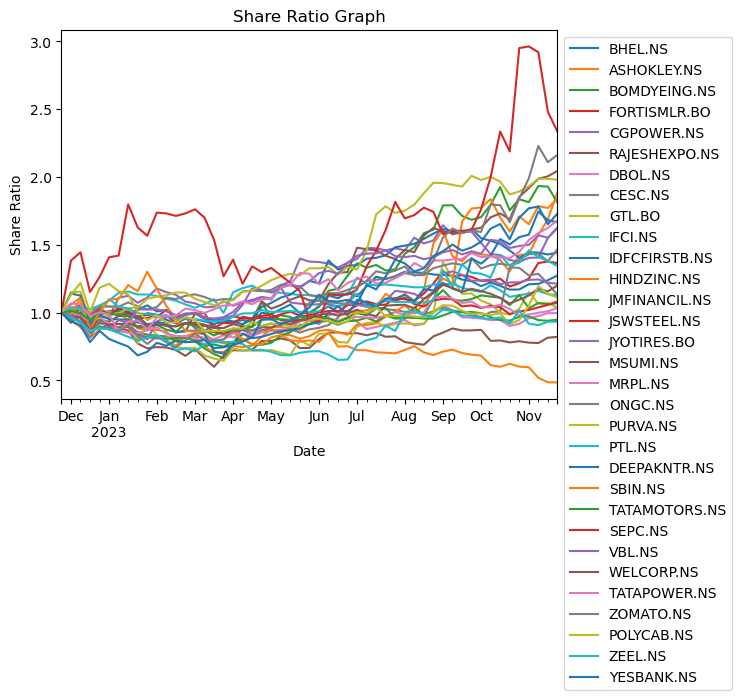

In [18]:

# Calculate the share ratio
share_ratio = stock_data / stock_data.iloc[0, :]

# Plot the share ratio graph
plt.figure(figsize=(20, 16))
share_ratio.plot()
plt.title('Share Ratio Graph')
plt.xlabel('Date')
plt.ylabel('Share Ratio')
plt.legend(tickers, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



In [67]:
# Calculate weekly returns for each stock
returns = stock_data.pct_change()

# Assuming risk-free rate is 0 for simplicity
risk_free_rate = 0.014

# Calculate Sharpe ratio for each stock
sharpe_ratios = (returns.mean() - risk_free_rate) / returns.std()

# Create a DataFrame for the Sharpe ratios
sharpe_ratio_df = pd.DataFrame(sharpe_ratios, columns=['Sharpe Ratio'])

# Display the Sharpe ratio matrix
print(sharpe_ratio_df)

               Sharpe Ratio
ASHOKLEY.NS       -0.287238
BHEL.NS            0.004958
BOMDYEING.NS      -0.009609
CESC.NS           -0.241979
CGPOWER.NS        -0.078256
DBOL.NS           -0.294939
DEEPAKNTR.NS      -0.375304
FORTISMLR.BO      -0.173422
GTL.BO            -0.095570
HINDZINC.NS       -0.310315
IDFCFIRSTB.NS     -0.138176
IFCI.NS            0.008992
JMFINANCIL.NS     -0.242334
JSWSTEEL.NS       -0.401111
JYOTIRES.BO       -0.169417
MRPL.NS            0.025832
MSUMI.NS          -0.397755
ONGC.NS           -0.231204
POLYCAB.NS        -0.001401
PTL.NS            -0.132557
PURVA.NS          -0.031416
RAJESHEXPO.NS     -0.380503
SBIN.NS           -0.462205
SEPC.NS            0.075267
TATAMOTORS.NS     -0.107262
TATAPOWER.NS      -0.318568
VBL.NS            -0.071884
WELCORP.NS         0.045279
YESBANK.NS        -0.167438
ZEEL.NS           -0.270861
ZOMATO.NS         -0.028107


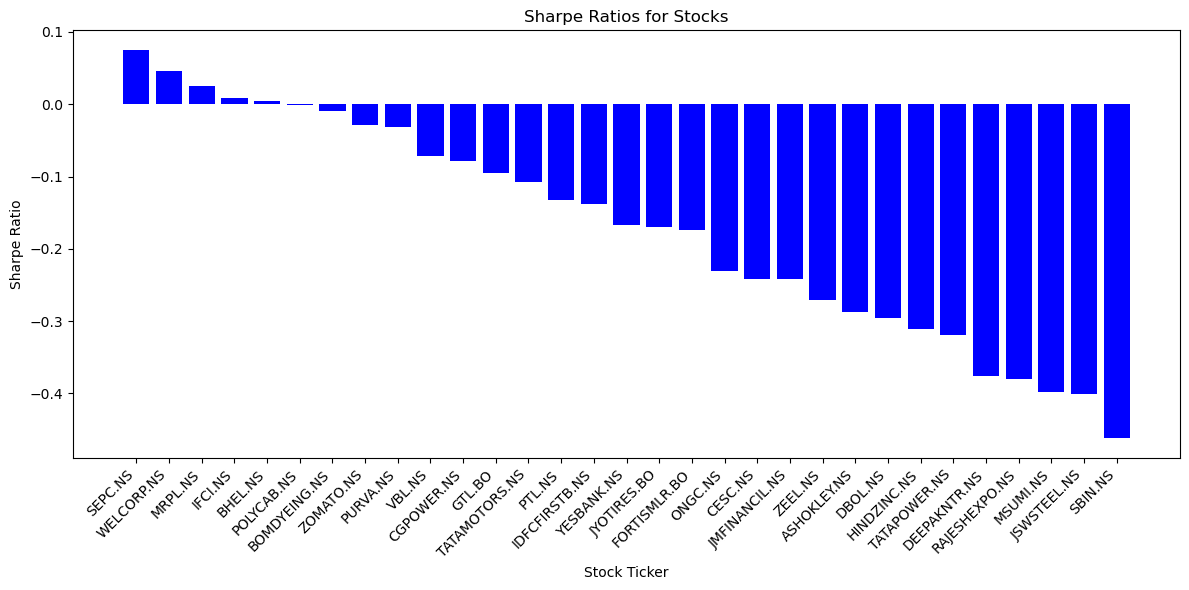

In [68]:
plt.figure(figsize=(12, 6))
sharpe_ratio_df.sort_values(by='Sharpe Ratio', ascending=False, inplace=True)
plt.bar(sharpe_ratio_df.index, sharpe_ratio_df['Sharpe Ratio'], color='blue')
plt.title('Sharpe Ratios for Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
# Given weights
asset_returns = {
    'ASHOKLEY.NS': -0.287238,
    'BHEL.NS': 0.004958,
    'BOMDYEING.NS': -0.009609,
    'CESC.NS': -0.241979,
    'CGPOWER.NS': -0.078256,
    'DBOL.NS': -0.294939,
    'DEEPAKNTR.NS': -0.375304,
    'FORTISMLR.BO': -0.173422,
    'GTL.BO': -0.095570,
    'HINDZINC.NS': -0.310315,
    'IDFCFIRSTB.NS': -0.138176,
    'IFCI.NS': 0.008992,
    'JMFINANCIL.NS': -0.242334,
    'JSWSTEEL.NS': -0.401111,
    'JYOTIRES.BO': -0.169417,
    'MRPL.NS': 0.025832,
    'MSUMI.NS': -0.397755,
    'ONGC.NS': -0.231204,
    'POLYCAB.NS': -0.001401,
    'PTL.NS': -0.132557,
    'PURVA.NS': -0.031416,
    'RAJESHEXPO.NS': -0.380503,
    'SBIN.NS': -0.462205,
    'SEPC.NS': 0.075267,
    'TATAMOTORS.NS': -0.107262,
    'TATAPOWER.NS': -0.318568,
    'VBL.NS': -0.071884,
    'WELCORP.NS': 0.045279,
    'YESBANK.NS': -0.167438,
    'ZEEL.NS': -0.270861,
    'ZOMATO.NS': -0.028107
}
# Convert returns to a numpy array
returns_array = np.array(list(asset_returns.values()))

# Scale returns to make all positive
scaled_returns = returns_array - np.min(returns_array)

# Normalize to sum to 1
weights = scaled_returns / np.sum(scaled_returns)

# Display the weights
for asset, weight in zip(asset_returns.keys(), weights):
    print(f"{asset}: {weight * 100:.2f}%")

ASHOKLEY.NS: 1.93%
BHEL.NS: 5.15%
BOMDYEING.NS: 4.99%
CESC.NS: 2.43%
CGPOWER.NS: 4.23%
DBOL.NS: 1.84%
DEEPAKNTR.NS: 0.96%
FORTISMLR.BO: 3.18%
GTL.BO: 4.04%
HINDZINC.NS: 1.67%
IDFCFIRSTB.NS: 3.57%
IFCI.NS: 5.20%
JMFINANCIL.NS: 2.42%
JSWSTEEL.NS: 0.67%
JYOTIRES.BO: 3.23%
MRPL.NS: 5.38%
MSUMI.NS: 0.71%
ONGC.NS: 2.55%
POLYCAB.NS: 5.08%
PTL.NS: 3.63%
PURVA.NS: 4.75%
RAJESHEXPO.NS: 0.90%
SBIN.NS: 0.00%
SEPC.NS: 5.93%
TATAMOTORS.NS: 3.91%
TATAPOWER.NS: 1.58%
VBL.NS: 4.30%
WELCORP.NS: 5.60%
YESBANK.NS: 3.25%
ZEEL.NS: 2.11%
ZOMATO.NS: 4.79%


In [73]:
from tabulate import tabulate

# Display the weights in a table
table_data = []
for asset, weight in zip(asset_returns.keys(), weights):
    table_data.append([asset, f"{weight * 100:.2f}%"])

table_headers = ["Asset", "Weight (%)"]
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")

print(table)

+---------------+------------+
|     Asset     | Weight (%) |
+---------------+------------+
|  ASHOKLEY.NS  |   1.93%    |
|    BHEL.NS    |   5.15%    |
| BOMDYEING.NS  |   4.99%    |
|    CESC.NS    |   2.43%    |
|  CGPOWER.NS   |   4.23%    |
|    DBOL.NS    |   1.84%    |
| DEEPAKNTR.NS  |   0.96%    |
| FORTISMLR.BO  |   3.18%    |
|    GTL.BO     |   4.04%    |
|  HINDZINC.NS  |   1.67%    |
| IDFCFIRSTB.NS |   3.57%    |
|    IFCI.NS    |   5.20%    |
| JMFINANCIL.NS |   2.42%    |
|  JSWSTEEL.NS  |   0.67%    |
|  JYOTIRES.BO  |   3.23%    |
|    MRPL.NS    |   5.38%    |
|   MSUMI.NS    |   0.71%    |
|    ONGC.NS    |   2.55%    |
|  POLYCAB.NS   |   5.08%    |
|    PTL.NS     |   3.63%    |
|   PURVA.NS    |   4.75%    |
| RAJESHEXPO.NS |   0.90%    |
|    SBIN.NS    |   0.00%    |
|    SEPC.NS    |   5.93%    |
| TATAMOTORS.NS |   3.91%    |
| TATAPOWER.NS  |   1.58%    |
|    VBL.NS     |   4.30%    |
|  WELCORP.NS   |   5.60%    |
|  YESBANK.NS   |   3.25%    |
|    ZEE


The output of the portfolio analysis includes the efficient frontier plot, as well as information about the portfolios with the maximum Sharpe ratio and minimum volatility. Let's break down how to interpret the key components:

Efficient Frontier Plot:

The scatter plot shows various simulated portfolios on the efficient frontier.
Each point on the plot represents a portfolio with different weights assigned to the selected stocks.
The x-axis represents the volatility (risk) of each portfolio.
The y-axis represents the expected return of each portfolio.
Max Sharpe Ratio Portfolio (Red Star):

The red star on the plot represents the portfolio with the maximum Sharpe ratio.
This portfolio is considered optimal because it provides the highest expected return for a given level of risk (volatility).
Min Volatility Portfolio (Blue Star):

The blue star on the plot represents the portfolio with the minimum volatility.
This portfolio is considered optimal for risk-averse investors who prioritize minimizing risk while achieving a reasonable return.
Sharpe Ratio Color Gradient:

The color gradient on the plot represents the Sharpe ratio of each portfolio.
Darker colors indicate higher Sharpe ratios, suggesting better risk-adjusted returns.
